In [0]:
! git clone https://github.com/jainkrunal/HandGestureRecognition


Cloning into 'HandGestureRecognition'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 5354 (delta 6), reused 19 (delta 4), pack-reused 5327
Receiving objects: 100% (5354/5354), 253.40 MiB | 37.89 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [0]:

import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
from PIL import Image

import random
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


Using TensorFlow backend.


In [0]:
labels_dict={"1":"one","2":"two","3":"three","4":"four","5":"five"}
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)]
        for f in file_names:
            images.append(Image.open(f))

            labels.append(int(d)-1)
    return images, labels
  
#start = timer()

ROOT_PATH="HandGestureRecognition/Data"
train_data_directory=os.path.join(ROOT_PATH, "train")
test_data_directory=os.path.join(ROOT_PATH, "test")

train_data, train_labels=load_data(train_data_directory)
test_data, test_labels=load_data(test_data_directory)
#timer() - start

In [0]:
#  Resize
def image_resize(images):
  images32 = [np.asarray(image.resize((28,28))) for image in images]
  images32 = np.array(images32)
  return images32
#start = timer()
train_data = image_resize(train_data)
test_data = image_resize(test_data)
#timer() - start

train_data, test_data = train_data / 255.0, test_data / 255.0

In [0]:
test_labels


[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3]

In [0]:

train_labels = to_categorical(train_labels, num_classes = 5)

test_labels = to_categorical(test_labels, num_classes = 5)

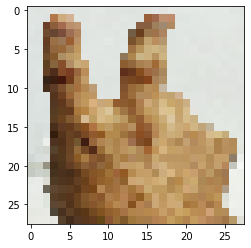

In [0]:
#train_data = rgb2gray(np.array(train_data))
#test_data = rgb2gray(np.array(test_data))
plt.imshow(train_data[0])



In [0]:
train_data.shape


(82, 28, 28, 3)

In [0]:
"""model=Sequential()
model.add(Convolution2D(32, (3, 3), strides=(2, 2), activation='relu', input_shape=(300,300,3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
"""

model = Sequential()



model.add(Convolution2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,3)))
model.add(Convolution2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#model.get_config()

In [0]:
model.fit(train_data, train_labels, epochs=100)


Train on 82 samples
Epoch 1/100
82/82 [==============================] - 3s 40ms/sample - loss: 1.8883 - acc: 0.2805
Epoch 2/100
82/82 [==============================] - 0s 194us/sample - loss: 1.5118 - acc: 0.3049
Epoch 3/100
82/82 [==============================] - 0s 195us/sample - loss: 1.5178 - acc: 0.3049
Epoch 4/100
82/82 [==============================] - 0s 191us/sample - loss: 1.4842 - acc: 0.3293
Epoch 5/100
82/82 [==============================] - 0s 233us/sample - loss: 1.4261 - acc: 0.3293
Epoch 6/100
82/82 [==============================] - 0s 185us/sample - loss: 1.4534 - acc: 0.2439
Epoch 7/100
82/82 [==============================] - 0s 178us/sample - loss: 1.4647 - acc: 0.3293
Epoch 8/100
82/82 [==============================] - 0s 186us/sample - loss: 1.4789 - acc: 0.2927
Epoch 9/100
82/82 [==============================] - 0s 219us/sample - loss: 1.4434 - acc: 0.3049
Epoch 10/100
82/82 [==============================] - 0s 219us/sample - loss: 1.4070 - acc: 0.3537


In [0]:
final_loss, final_acc = model.evaluate(test_data, test_labels, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 6.2793, final accuracy: 0.6400


In [0]:
#To save model weights in h5 format
#model.save("hand_gestures_model.h5")
#from google.colab import files
#files.download("hand_gestures_model.h5")

In [0]:
sample_indexes = random.sample(range(len(test_data)), 10)
sample_images = [test_data[i] for i in sample_indexes]
sample_labels = [test_labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = model.predict(test_data)
                        
# Print the real and predicted labels
print(test_labels)
print(predicted)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
[[6.74839169e-02 7.06626058e-01 4.24295308e-07 2.25888953e-01
  6.59451644e-07]
 [9.99999881e-01 1.35611007e-08 1.84921946e-14 2.96532754e-09
  8.17815646e-08]
 [9.99999285e-01 6.90701484e-07 1.16743358e-14 6.26787229e-15
  5.13735321e-09]
 [1.00000000e+00 6.40489484e-09 4.97815590e-17 6.67530972e-13
  7.58281701e-11]
 [9.99974608e-01 2.46268319e-05 2.48876852e-12 1.67825824e-08
  6.70679071e-07]
 [9.99978185e-01 2.18486421e-05 3.40517951e-14 6.85562125e-15
  1.97197103e-09]
 [8.83534074e-01 3.41945998e-02 2.03874336e-07 6.78330213e-02
  1.443

In [0]:
count=0
for i in range(len(predicted)):
  if np.where(predicted[i]==max(predicted[i]))==np.where(test_labels[i]==max(test_labels[i])):
    count+=1
count,len(predicted)

(16, 25)

In [0]:
np.where(predicted[i]==max(predicted[i]))

(array([3]),)

ValueError: ignored

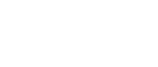

In [0]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(15, 15))
for i in range(len(test_data)):
    truth = test_labels[i]
    prediction = predicted[i]
    plt.subplot(13, 5,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(chr(truth), chr(prediction)), 
             fontsize=12, color=color)
    plt.imshow(test_data[i],cmap='gray')

plt.show()

In [0]:
sess.close()